# Recurrent Neural Networks for Simple Time Series Data (Synthetic Data) by `Mr. Harshit Dawar`

## Importing the Required Libraries

In [1]:
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

### Generating Data without Noise 

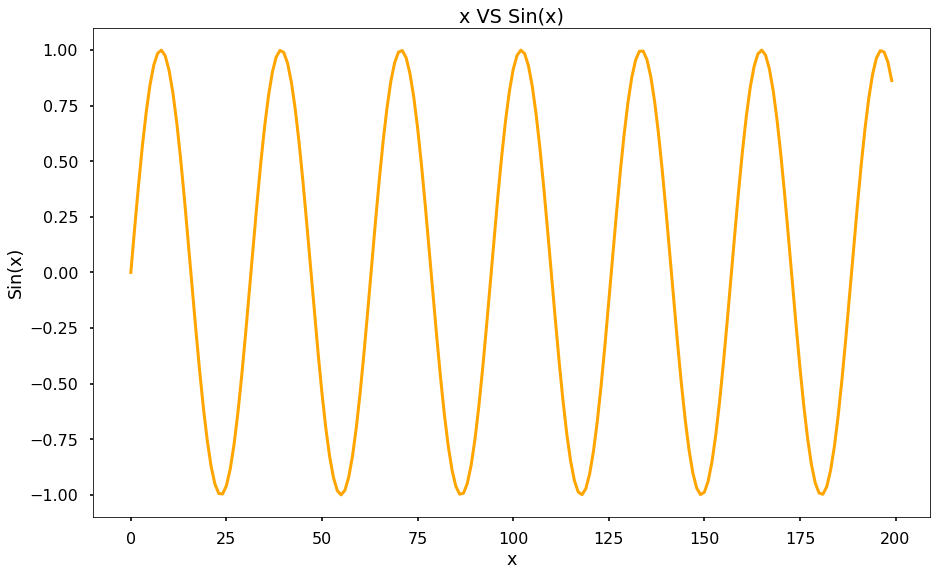

In [2]:
syntheticTimeSeriesData = np.sin(0.2 * np.arange(200))
plt.style.use("seaborn-poster")
plt.figure(figsize = (15, 9))
plt.plot(syntheticTimeSeriesData, c = "orange", linestyle = "solid", linewidth = 3)
plt.title("x VS Sin(x)")
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.show()

In [3]:
T = 10
Dimension = 1
data = []
forecast = []

for t in range(len(syntheticTimeSeriesData) - T):
    data.append(
        syntheticTimeSeriesData[t : t + T]
    )
    forecast.append(
        syntheticTimeSeriesData[t + T]
    )

data = np.array(data)
forecast = np.array(forecast)

In [4]:
data.shape, forecast.shape

((190, 10), (190,))

In [5]:
data[0]

array([0.        , 0.19866933, 0.38941834, 0.56464247, 0.71735609,
       0.84147098, 0.93203909, 0.98544973, 0.9995736 , 0.97384763])

In [6]:
forecast[0]

0.9092974268256817

In [7]:
# Changing the shape of the data as required by the RNN (3 Dimensions)
data = data.reshape(-1, T, 1)

In [8]:
data.shape

(190, 10, 1)

### Building a Model with Activation Function

In [12]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))

In [13]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 90ms/step - loss: 0.1845 - val_loss: 0.1163
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0984 - val_loss: 0.0651
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0554 - val_loss: 0.0342
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0262 - val_loss: 0.0136
Epoch 5/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 7/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 8/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0077 - val_loss: 0.0085
Epoch 9/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 11/500
3/3 [=

Epoch 79/500
3/3 [==============================] - 0s 13ms/step - loss: 1.9027e-04 - val_loss: 1.9612e-04
Epoch 80/500
3/3 [==============================] - 0s 11ms/step - loss: 1.9717e-04 - val_loss: 1.8416e-04
Epoch 81/500
3/3 [==============================] - 0s 12ms/step - loss: 1.8061e-04 - val_loss: 1.9390e-04
Epoch 82/500
3/3 [==============================] - 0s 11ms/step - loss: 1.9281e-04 - val_loss: 1.8094e-04
Epoch 83/500
3/3 [==============================] - 0s 11ms/step - loss: 1.9714e-04 - val_loss: 1.8578e-04
Epoch 84/500
3/3 [==============================] - 0s 12ms/step - loss: 1.8228e-04 - val_loss: 1.8077e-04
Epoch 85/500
3/3 [==============================] - 0s 10ms/step - loss: 1.9228e-04 - val_loss: 1.8012e-04
Epoch 86/500
3/3 [==============================] - 0s 13ms/step - loss: 1.9717e-04 - val_loss: 1.8581e-04
Epoch 87/500
3/3 [==============================] - 0s 12ms/step - loss: 1.8166e-04 - val_loss: 1.8754e-04
Epoch 88/500
3/3 [===================

3/3 [==============================] - 0s 11ms/step - loss: 8.7251e-05 - val_loss: 9.4148e-05
Epoch 156/500
3/3 [==============================] - 0s 12ms/step - loss: 9.1205e-05 - val_loss: 8.5350e-05
Epoch 157/500
3/3 [==============================] - 0s 11ms/step - loss: 8.8828e-05 - val_loss: 8.3928e-05
Epoch 158/500
3/3 [==============================] - 0s 15ms/step - loss: 8.5833e-05 - val_loss: 8.5201e-05
Epoch 159/500
3/3 [==============================] - 0s 15ms/step - loss: 8.4696e-05 - val_loss: 8.3406e-05
Epoch 160/500
3/3 [==============================] - 0s 12ms/step - loss: 8.4092e-05 - val_loss: 8.0707e-05
Epoch 161/500
3/3 [==============================] - 0s 11ms/step - loss: 8.7067e-05 - val_loss: 8.0151e-05
Epoch 162/500
3/3 [==============================] - 0s 10ms/step - loss: 8.4754e-05 - val_loss: 8.2541e-05
Epoch 163/500
3/3 [==============================] - 0s 11ms/step - loss: 8.7802e-05 - val_loss: 8.2940e-05
Epoch 164/500
3/3 [=======================

Epoch 231/500
3/3 [==============================] - 0s 14ms/step - loss: 6.4324e-05 - val_loss: 5.6302e-05
Epoch 232/500
3/3 [==============================] - 0s 15ms/step - loss: 5.9277e-05 - val_loss: 5.0175e-05
Epoch 233/500
3/3 [==============================] - 0s 12ms/step - loss: 4.6535e-05 - val_loss: 4.8150e-05
Epoch 234/500
3/3 [==============================] - 0s 12ms/step - loss: 4.5085e-05 - val_loss: 4.6526e-05
Epoch 235/500
3/3 [==============================] - 0s 12ms/step - loss: 4.7476e-05 - val_loss: 4.0583e-05
Epoch 236/500
3/3 [==============================] - 0s 12ms/step - loss: 4.2031e-05 - val_loss: 4.1284e-05
Epoch 237/500
3/3 [==============================] - 0s 14ms/step - loss: 4.1404e-05 - val_loss: 4.1933e-05
Epoch 238/500
3/3 [==============================] - 0s 14ms/step - loss: 4.5211e-05 - val_loss: 3.9962e-05
Epoch 239/500
3/3 [==============================] - 0s 13ms/step - loss: 4.3254e-05 - val_loss: 3.9278e-05
Epoch 240/500
3/3 [=========

Epoch 307/500
3/3 [==============================] - 0s 13ms/step - loss: 2.5761e-05 - val_loss: 2.0254e-05
Epoch 308/500
3/3 [==============================] - 0s 11ms/step - loss: 2.2927e-05 - val_loss: 2.1772e-05
Epoch 309/500
3/3 [==============================] - 0s 11ms/step - loss: 2.3669e-05 - val_loss: 2.1900e-05
Epoch 310/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4215e-05 - val_loss: 2.1242e-05
Epoch 311/500
3/3 [==============================] - 0s 11ms/step - loss: 2.0371e-05 - val_loss: 2.0713e-05
Epoch 312/500
3/3 [==============================] - 0s 11ms/step - loss: 2.6258e-05 - val_loss: 1.9209e-05
Epoch 313/500
3/3 [==============================] - ETA: 0s - loss: 1.9279e-0 - 0s 12ms/step - loss: 2.6668e-05 - val_loss: 1.8027e-05
Epoch 314/500
3/3 [==============================] - 0s 11ms/step - loss: 2.3253e-05 - val_loss: 1.8064e-05
Epoch 315/500
3/3 [==============================] - 0s 12ms/step - loss: 1.9067e-05 - val_loss: 1.8448e-05


3/3 [==============================] - 0s 12ms/step - loss: 1.4971e-05 - val_loss: 1.0517e-05
Epoch 383/500
3/3 [==============================] - 0s 11ms/step - loss: 1.7065e-05 - val_loss: 1.1033e-05
Epoch 384/500
3/3 [==============================] - 0s 13ms/step - loss: 1.6627e-05 - val_loss: 1.1946e-05
Epoch 385/500
3/3 [==============================] - 0s 10ms/step - loss: 1.2964e-05 - val_loss: 1.5065e-05
Epoch 386/500
3/3 [==============================] - 0s 12ms/step - loss: 1.4735e-05 - val_loss: 1.8869e-05
Epoch 387/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5018e-05 - val_loss: 1.8362e-05
Epoch 388/500
3/3 [==============================] - 0s 10ms/step - loss: 1.3982e-05 - val_loss: 1.5362e-05
Epoch 389/500
3/3 [==============================] - ETA: 0s - loss: 1.5597e-0 - 0s 12ms/step - loss: 1.4739e-05 - val_loss: 1.1097e-05
Epoch 390/500
3/3 [==============================] - 0s 12ms/step - loss: 1.1785e-05 - val_loss: 9.7433e-06
Epoch 391/500


3/3 [==============================] - 0s 12ms/step - loss: 1.1889e-05 - val_loss: 8.2309e-06
Epoch 458/500
3/3 [==============================] - 0s 12ms/step - loss: 8.8728e-06 - val_loss: 8.8669e-06
Epoch 459/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1214e-05 - val_loss: 9.4153e-06
Epoch 460/500
3/3 [==============================] - 0s 12ms/step - loss: 1.1037e-05 - val_loss: 9.6819e-06
Epoch 461/500
3/3 [==============================] - 0s 13ms/step - loss: 1.2016e-05 - val_loss: 9.3365e-06
Epoch 462/500
3/3 [==============================] - 0s 12ms/step - loss: 1.1876e-05 - val_loss: 9.8296e-06
Epoch 463/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0900e-05 - val_loss: 1.0279e-05
Epoch 464/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8517e-06 - val_loss: 9.1193e-06
Epoch 465/500
3/3 [==============================] - 0s 13ms/step - loss: 8.8628e-06 - val_loss: 8.9427e-06
Epoch 466/500
3/3 [=======================

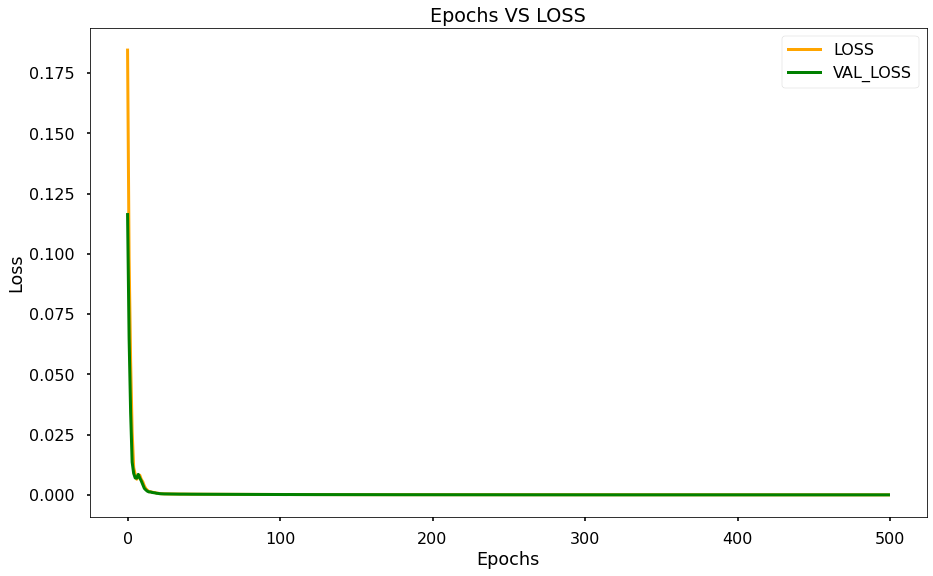

In [15]:
plt.style.use("seaborn-poster")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()